# Preprocessing

In [1]:
#Import Library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Import dataset

datapath = '../../../1. Data/Raw/Data Historis PGAS.csv'
dataset = pd.read_csv(datapath)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,01/03/2024,1105,1090,1110,1090,"53,60M","1,38%"
1,29/02/2024,1090,1115,1115,1090,"132,02M","-2,24%"
2,28/02/2024,1115,1125,1125,1105,"75,90M","-0,89%"
3,27/02/2024,1125,1140,1140,1120,"71,32M","-0,88%"
4,26/02/2024,1135,1160,1160,1130,"67,38M","-2,16%"
...,...,...,...,...,...,...,...
2426,07/03/2014,4960,5025,5050,4960,"9,67M","-0,80%"
2427,06/03/2014,5000,5050,5075,5000,"12,10M","0,00%"
2428,05/03/2014,5000,4955,5075,4945,"23,96M","1,11%"
2429,04/03/2014,4945,4910,4945,4910,"12,32M","0,10%"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2431 non-null   object
 1   Terakhir    2431 non-null   int64 
 2   Pembukaan   2431 non-null   int64 
 3   Tertinggi   2431 non-null   int64 
 4   Terendah    2431 non-null   int64 
 5   Vol         2431 non-null   object
 6   Perubahan%  2431 non-null   object
dtypes: int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
dataset.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2431.000000,2431.000000,2431.000000,2431.000000
mean,2357.130810,2362.379679,2397.130810,2325.318799
std,1334.055748,1335.914032,1345.166329,1321.762016
min,605.000000,610.000000,680.000000,605.000000
25%,1425.000000,1422.500000,1450.000000,1400.000000
50%,1990.000000,1990.000000,2030.000000,1965.000000
75%,2615.000000,2625.000000,2665.000000,2585.000000
max,6175.000000,6225.000000,6225.000000,6150.000000


In [5]:
dataset.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [6]:
from datetime import datetime
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'],
                                   format = '%d/%m/%Y')
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-03-01,1105,1090,1110,1090,"53,60M","1,38%"
1,2024-02-29,1090,1115,1115,1090,"132,02M","-2,24%"
2,2024-02-28,1115,1125,1125,1105,"75,90M","-0,89%"
3,2024-02-27,1125,1140,1140,1120,"71,32M","-0,88%"
4,2024-02-26,1135,1160,1160,1130,"67,38M","-2,16%"
...,...,...,...,...,...,...,...
2426,2014-03-07,4960,5025,5050,4960,"9,67M","-0,80%"
2427,2014-03-06,5000,5050,5075,5000,"12,10M","0,00%"
2428,2014-03-05,5000,4955,5075,4945,"23,96M","1,11%"
2429,2014-03-04,4945,4910,4945,4910,"12,32M","0,10%"


In [7]:
dataset = dataset.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,4940,4900,4945,4885,"11,51M","0,82%"
1,2014-03-04,4945,4910,4945,4910,"12,32M","0,10%"
2,2014-03-05,5000,4955,5075,4945,"23,96M","1,11%"
3,2014-03-06,5000,5050,5075,5000,"12,10M","0,00%"
4,2014-03-07,4960,5025,5050,4960,"9,67M","-0,80%"
...,...,...,...,...,...,...,...
2426,2024-02-26,1135,1160,1160,1130,"67,38M","-2,16%"
2427,2024-02-27,1125,1140,1140,1120,"71,32M","-0,88%"
2428,2024-02-28,1115,1125,1125,1105,"75,90M","-0,89%"
2429,2024-02-29,1090,1115,1115,1090,"132,02M","-2,24%"


In [8]:
dataset_B = dataset[dataset['Vol'].str.contains('B')]
print(dataset_B)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah    Vol Perubahan%
1666 2021-01-14      1810       1620       1865      1590  1,07B     12,07%


In [9]:
dataset_M = dataset[dataset['Vol'].str.contains('M')]
print(dataset_M)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah      Vol Perubahan%
0    2014-03-03      4940       4900       4945      4885   11,51M      0,82%
1    2014-03-04      4945       4910       4945      4910   12,32M      0,10%
2    2014-03-05      5000       4955       5075      4945   23,96M      1,11%
3    2014-03-06      5000       5050       5075      5000   12,10M      0,00%
4    2014-03-07      4960       5025       5050      4960    9,67M     -0,80%
...         ...       ...        ...        ...       ...      ...        ...
2426 2024-02-26      1135       1160       1160      1130   67,38M     -2,16%
2427 2024-02-27      1125       1140       1140      1120   71,32M     -0,88%
2428 2024-02-28      1115       1125       1125      1105   75,90M     -0,89%
2429 2024-02-29      1090       1115       1115      1090  132,02M     -2,24%
2430 2024-03-01      1105       1090       1110      1090   53,60M      1,38%

[2430 rows x 7 columns]


In [10]:
dataset_K = dataset[dataset['Vol'].str.contains('K')]
print(dataset_K)

Empty DataFrame
Columns: [Tanggal, Terakhir, Pembukaan, Tertinggi, Terendah, Vol, Perubahan%]
Index: []


In [11]:
dataset = dataset.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,4940,4900,4945,4885,11.51M,0.82%
1,2014-03-04,4945,4910,4945,4910,12.32M,0.10%
2,2014-03-05,5000,4955,5075,4945,23.96M,1.11%
3,2014-03-06,5000,5050,5075,5000,12.10M,0.00%
4,2014-03-07,4960,5025,5050,4960,9.67M,-0.80%
...,...,...,...,...,...,...,...
2426,2024-02-26,1135,1160,1160,1130,67.38M,-2.16%
2427,2024-02-27,1125,1140,1140,1120,71.32M,-0.88%
2428,2024-02-28,1115,1125,1125,1105,75.90M,-0.89%
2429,2024-02-29,1090,1115,1115,1090,132.02M,-2.24%


In [12]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset['Vol'] = dataset['Vol'].apply(replace_value)

dataset

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2014-03-03,4940,4900,4945,4885,11510000.0,0.82%
1,2014-03-04,4945,4910,4945,4910,12320000.0,0.10%
2,2014-03-05,5000,4955,5075,4945,23960000.0,1.11%
3,2014-03-06,5000,5050,5075,5000,12100000.0,0.00%
4,2014-03-07,4960,5025,5050,4960,9670000.0,-0.80%
...,...,...,...,...,...,...,...
2426,2024-02-26,1135,1160,1160,1130,67380000.0,-2.16%
2427,2024-02-27,1125,1140,1140,1120,71320000.0,-0.88%
2428,2024-02-28,1115,1125,1125,1105,75900000.0,-0.89%
2429,2024-02-29,1090,1115,1115,1090,132020000.00000001,-2.24%


In [13]:
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir               int64
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [14]:
dataset = dataset.astype({'Terakhir': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [15]:
dataset = dataset.astype({'Vol': 'float32'})
dataset.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431 entries, 0 to 2430
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2431 non-null   datetime64[ns]
 1   Terakhir    2431 non-null   float32       
 2   Pembukaan   2431 non-null   int64         
 3   Tertinggi   2431 non-null   int64         
 4   Terendah    2431 non-null   int64         
 5   Vol         2431 non-null   float32       
 6   Perubahan%  2431 non-null   object        
dtypes: datetime64[ns](1), float32(2), int64(3), object(1)
memory usage: 114.1+ KB


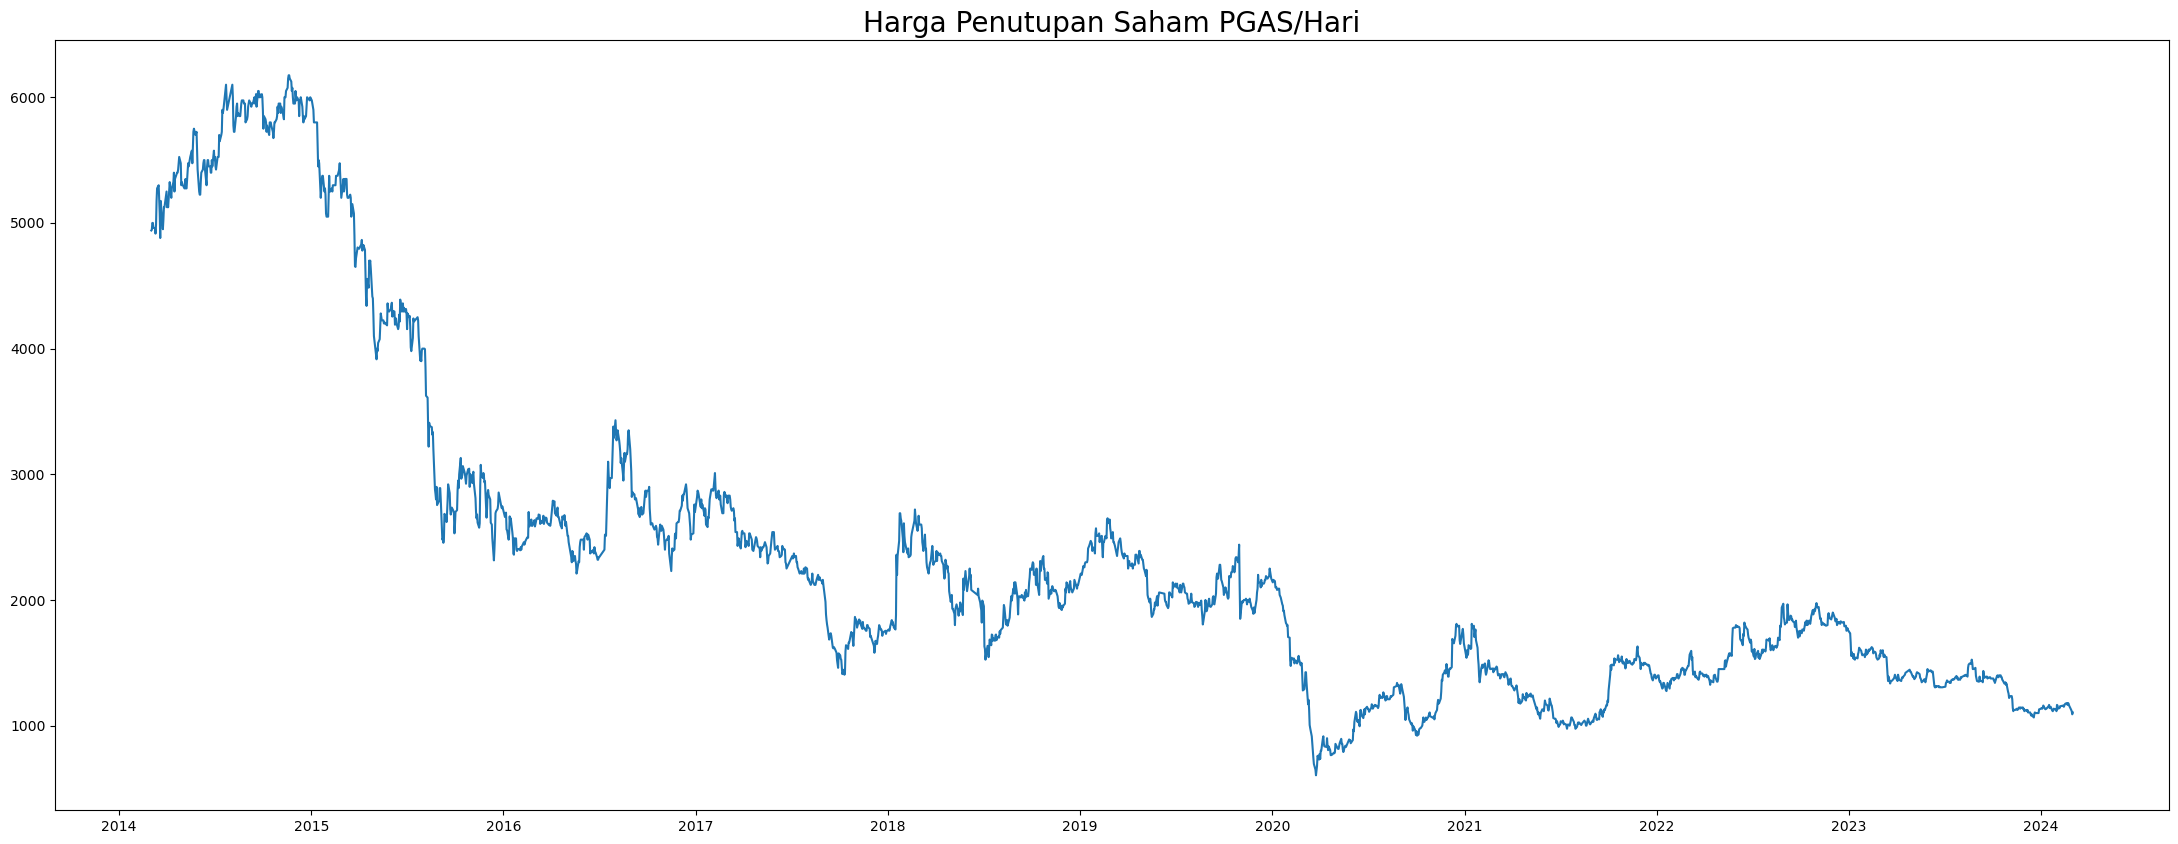

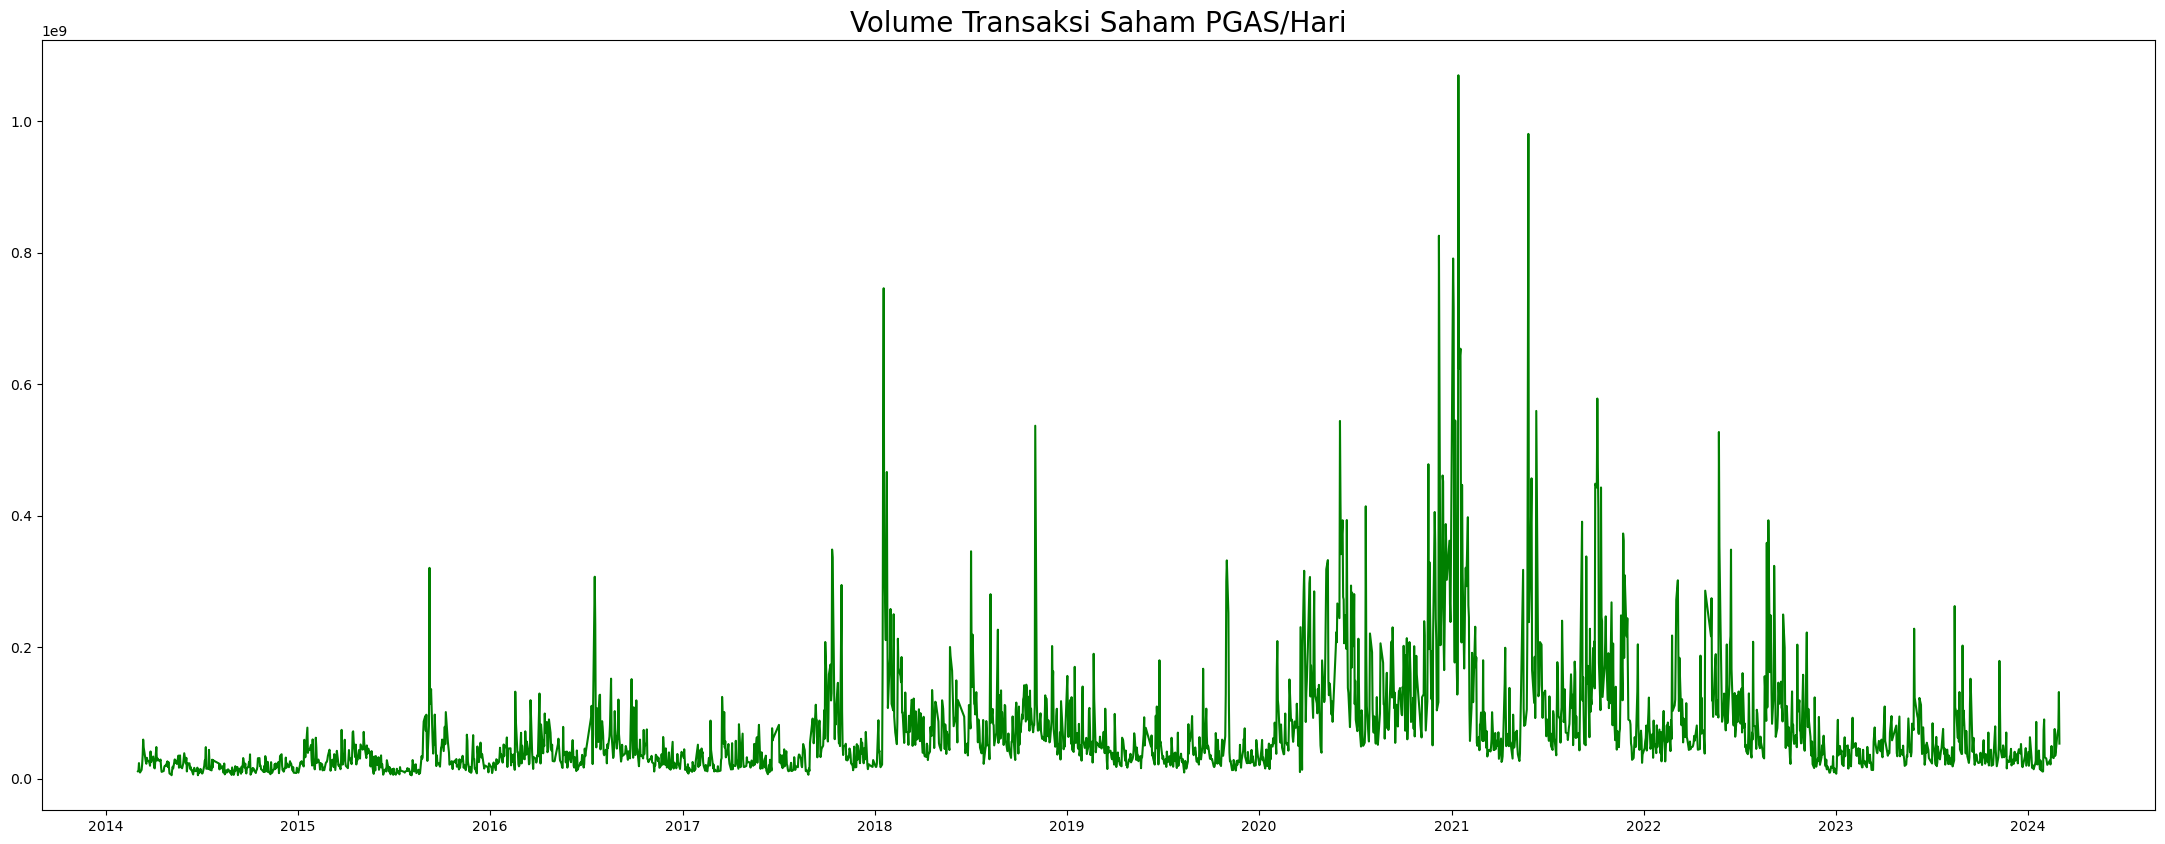

In [17]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Terakhir'])
plt.title('Harga Penutupan Saham PGAS/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset['Tanggal'], dataset['Vol'], 'g')
plt.title('Volume Transaksi Saham PGAS/Hari', fontsize = 20)

plt.show()

In [18]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu")
print(f"Using {device} device")

Using cuda device


In [19]:
data_use = np.column_stack((dataset['Terakhir'], dataset['Vol']))
tanggal_data = pd.DataFrame({'Tanggal' : dataset['Tanggal']})

print(data_use)
print(tanggal_data)

[[4.9400e+03 1.1510e+07]
 [4.9450e+03 1.2320e+07]
 [5.0000e+03 2.3960e+07]
 ...
 [1.1150e+03 7.5900e+07]
 [1.0900e+03 1.3202e+08]
 [1.1050e+03 5.3600e+07]]
        Tanggal
0    2014-03-03
1    2014-03-04
2    2014-03-05
3    2014-03-06
4    2014-03-07
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[2431 rows x 1 columns]


In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_use)

In [21]:
seq_length = 1

x_train = []
y_train = []

seq_length = 10
for i in range (len(scaled_data) - seq_length):
    x_train.append(scaled_data[i:i + seq_length])
    y_train.append(scaled_data[i + seq_length, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)

In [22]:
print(x_train)
print(y_train)

[[[0.77827644 0.00569255]
  [0.7791741  0.00645343]
  [0.78904843 0.01738763]
  ...
  [0.78635544 0.02848152]
  [0.82046676 0.05098868]
  [0.83842003 0.03957541]]

 [[0.7791741  0.00645343]
  [0.78904843 0.01738763]
  [0.78904843 0.00624677]
  ...
  [0.82046676 0.05098868]
  [0.83842003 0.03957541]
  [0.8429084  0.02461134]]

 [[0.78904843 0.01738763]
  [0.78904843 0.00624677]
  [0.7818671  0.00396412]
  ...
  [0.83842003 0.03957541]
  [0.8429084  0.02461134]
  [0.82046676 0.01948241]]

 ...

 [[0.0978456  0.01544314]
  [0.10143626 0.04176413]
  [0.10233393 0.02646189]
  ...
  [0.09964094 0.03245503]
  [0.0951526  0.05817482]
  [0.09335726 0.06187591]]

 [[0.10143626 0.04176413]
  [0.10233393 0.02646189]
  [0.10323159 0.02457376]
  ...
  [0.0951526  0.05817482]
  [0.09335726 0.06187591]
  [0.09156194 0.0661782 ]]

 [[0.10233393 0.02646189]
  [0.10323159 0.02457376]
  [0.1005386  0.02785214]
  ...
  [0.09335726 0.06187591]
  [0.09156194 0.0661782 ]
  [0.08707361 0.11889531]]]
[[0.842908

In [23]:
train_size = int(len(x_train) * 0.8)
x_train, x_test = x_train[:train_size], x_train[train_size:]
y_train, y_test = y_train[:train_size], y_train[train_size:]
tanggal_train, tanggal_test = tanggal_data[seq_length:train_size+seq_length], tanggal_data[train_size+seq_length:]

print(x_train.shape)
print(y_train.shape)
print(tanggal_train.shape)
print(y_test.shape)
print(tanggal_test.shape)

print(tanggal_test)

(1936, 10, 2)
(1936, 1)
(1936, 1)
(485, 1)
(485, 1)
        Tanggal
1946 2022-03-04
1947 2022-03-07
1948 2022-03-08
1949 2022-03-09
1950 2022-03-10
...         ...
2426 2024-02-26
2427 2024-02-27
2428 2024-02-28
2429 2024-02-29
2430 2024-03-01

[485 rows x 1 columns]


In [24]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [25]:
# Memastikan bentuk data benar
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)

# Menampilkan contoh data dari x_train_tensor dan y_train_tensor
print("\nContoh data dari x_train_tensor:")
print(x_train_tensor[0])  # Menampilkan sampel pertama dari x_train_tensor

print("\nContoh data dari y_train_tensor:")
print(y_train_tensor[0])  # Menampilkan target pertama dari y_train_tensor

x_train_tensor shape: torch.Size([1936, 10, 2])
y_train_tensor shape: torch.Size([1936, 1])
x_test_tensor shape: torch.Size([485, 10, 2])
y_test_tensor shape: torch.Size([485, 1])

Contoh data dari x_train_tensor:
tensor([[0.7783, 0.0057],
        [0.7792, 0.0065],
        [0.7890, 0.0174],
        [0.7890, 0.0062],
        [0.7819, 0.0040],
        [0.7819, 0.0077],
        [0.7738, 0.0151],
        [0.7864, 0.0285],
        [0.8205, 0.0510],
        [0.8384, 0.0396]])

Contoh data dari y_train_tensor:
tensor([0.8429])


In [26]:
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockPricePredictor, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru1 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        h0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm1(x, (h0_lstm1, c0_lstm1))
        
        h0_gru1 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru1(out, h0_gru1)
        
        h0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0_lstm2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm2(out, (h0_lstm2, c0_lstm2))
        
        h0_gru2 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru2(out, h0_gru2)
        
        out = self.fc(out[:, -1, :])
        return out

In [27]:
# Membuat TensorDataset dan DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (num_samples, seq_length, num_features)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (num_samples, 1)
print(f"x_test_tensor shape: {x_test_tensor.shape}")    # (num_samples, seq_length, num_features)
print(f"y_test_tensor shape: {y_test_tensor.shape}")    # (num_samples, 1)


x_train_tensor shape: torch.Size([1936, 10, 2])
y_train_tensor shape: torch.Size([1936, 1])
x_test_tensor shape: torch.Size([485, 10, 2])
y_test_tensor shape: torch.Size([485, 1])


In [29]:
input_size = x_train_tensor.shape[2]  # number of features, in this case 2
hidden_size = 64
num_layers = 2
num_epochs = 30
learning_rate = 0.001

# Initialize model, loss function, optimizer
model = StockPricePredictor(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    # Average training loss for this epoch
    train_losses.append(epoch_train_loss / len(train_loader))
    
    # Validation loss
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_targets)
            epoch_val_loss += val_loss.item()
    
    # Average validation loss for this epoch
    val_losses.append(epoch_val_loss / len(test_loader))
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')


Epoch [1/30], Loss: 0.0143
Epoch [1/30], Training Loss: 0.0520, Validation Loss: 0.0182
Epoch [2/30], Loss: 0.0015
Epoch [2/30], Training Loss: 0.0041, Validation Loss: 0.0011
Epoch [3/30], Loss: 0.0013
Epoch [3/30], Training Loss: 0.0014, Validation Loss: 0.0005
Epoch [4/30], Loss: 0.0009
Epoch [4/30], Training Loss: 0.0013, Validation Loss: 0.0009
Epoch [5/30], Loss: 0.0014
Epoch [5/30], Training Loss: 0.0011, Validation Loss: 0.0009
Epoch [6/30], Loss: 0.0020
Epoch [6/30], Training Loss: 0.0013, Validation Loss: 0.0010
Epoch [7/30], Loss: 0.0006
Epoch [7/30], Training Loss: 0.0011, Validation Loss: 0.0010
Epoch [8/30], Loss: 0.0006
Epoch [8/30], Training Loss: 0.0009, Validation Loss: 0.0003
Epoch [9/30], Loss: 0.0004
Epoch [9/30], Training Loss: 0.0010, Validation Loss: 0.0002
Epoch [10/30], Loss: 0.0009
Epoch [10/30], Training Loss: 0.0011, Validation Loss: 0.0003
Epoch [11/30], Loss: 0.0008
Epoch [11/30], Training Loss: 0.0010, Validation Loss: 0.0002
Epoch [12/30], Loss: 0.0015


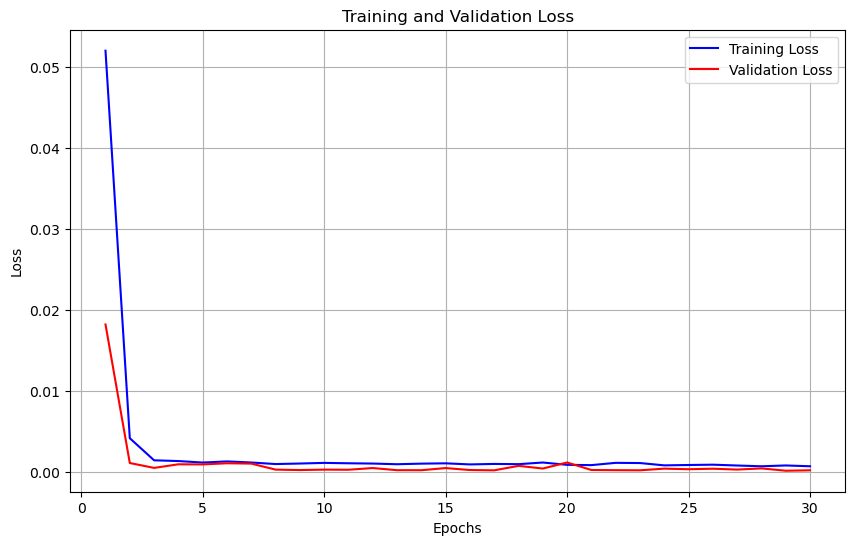

In [30]:
# Visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    predictions = []
    actuals = []
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.cpu().numpy())

test_loss /= len(test_loader)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0002


In [32]:
# Convert predictions and actuals to numpy arrays
predictions = np.array(predictions)
actuals = np.array(actuals)

In [33]:
# Predictions
model.eval()
with torch.no_grad():
    predictions = []
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())

predictions = np.array(predictions)
print(predictions[:10])  # Menampilkan 10 prediksi pertama

[[0.14397675]
 [0.14647456]
 [0.15132186]
 [0.15743825]
 [0.16181731]
 [0.1634517 ]
 [0.16146752]
 [0.15766399]
 [0.15141815]
 [0.14509448]]


In [34]:
# Membuat DataFrame untuk perbandingan hasil prediksi dan nilai aktual
comparison_df = pd.DataFrame({
    'Predicted': predictions.flatten(),
    'Actual': actuals.flatten()
})

# Menampilkan DataFrame
print(comparison_df)

     Predicted    Actual
0     0.143977  0.172352
1     0.146475  0.177738
2     0.151322  0.165171
3     0.157438  0.168761
4     0.161817  0.149910
..         ...       ...
480   0.092044  0.095153
481   0.092097  0.093357
482   0.091739  0.091562
483   0.090952  0.087074
484   0.090193  0.089767

[485 rows x 2 columns]


In [35]:
# Menghitung metrik
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actuals, predictions)

# Menampilkan hasil
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")

MSE: 0.0002
RMSE: 0.0134
MAPE: 7.4277%


In [36]:
# Membuat Data Frame
train_df = pd.DataFrame({
    'Tanggal': tanggal_train['Tanggal'],
    'Value': y_train.flatten(),
    'Type': 'Train'
})

test_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': y_test.flatten(),
    'Type': 'Test'
})

predicted_df = pd.DataFrame({
    'Tanggal': tanggal_test['Tanggal'],
    'Value': predictions.flatten(),
    'Type': 'Predicted'
})

In [37]:
compact_df = pd.concat([test_df, predicted_df])

In [38]:
# Menggabungkan DataFrame
combined_df = pd.concat([train_df, test_df, predicted_df])

# Menampilkan DataFrame
print(combined_df)

        Tanggal     Value       Type
10   2014-03-17  0.842908      Train
11   2014-03-18  0.820467      Train
12   2014-03-19  0.802513      Train
13   2014-03-20  0.767504      Train
14   2014-03-21  0.820467      Train
...         ...       ...        ...
2426 2024-02-26  0.092044  Predicted
2427 2024-02-27  0.092097  Predicted
2428 2024-02-28  0.091739  Predicted
2429 2024-02-29  0.090952  Predicted
2430 2024-03-01  0.090193  Predicted

[2906 rows x 3 columns]


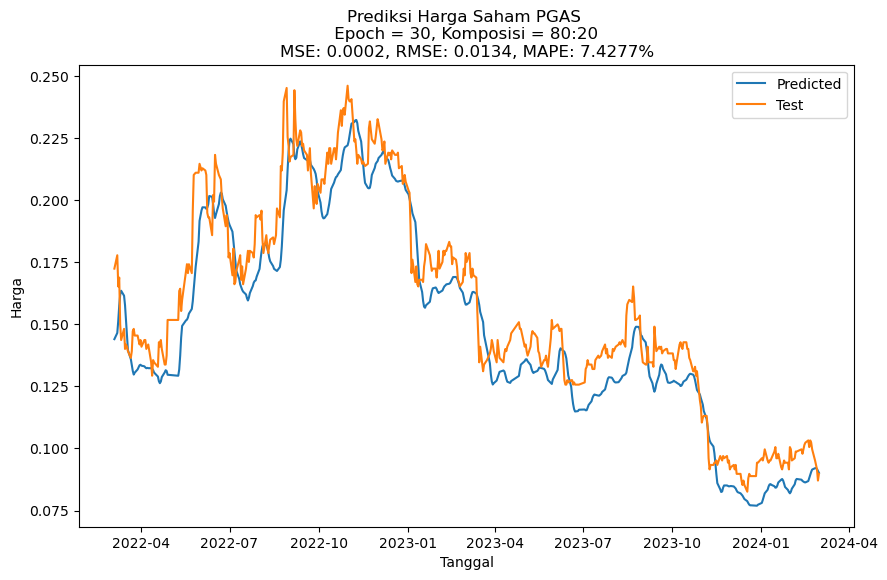

In [39]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in compact_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham PGAS \n Epoch = 30, Komposisi = 80:20 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

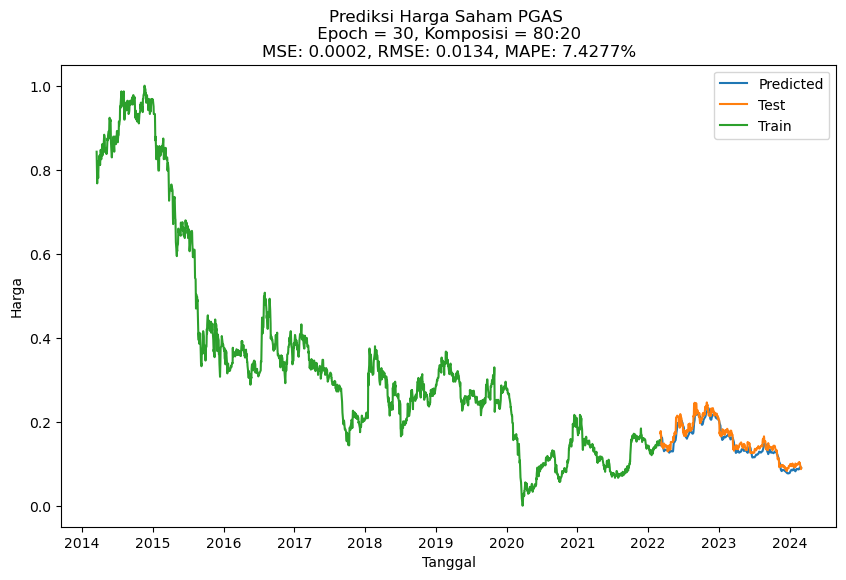

In [40]:
# Plotting hasil prediksi dan nilai aktual
plt.figure(figsize=(10, 6))
for label, df in combined_df.groupby('Type'):
    plt.plot(df['Tanggal'], df['Value'], label=label)
plt.title('Prediksi Harga Saham PGAS \n Epoch = 30, Komposisi = 80:20 \n' f"MSE: {mse:.4f}" ', ' f"RMSE: {rmse:.4f}" ', ' f"MAPE: {mape:.4%}")
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Prediksi Harga 1 Bulan Kedepan 10 Juni - 8 July

In [41]:
#Import dataset

datapath_new = 'data/Data Historis PGAS 1 Bulan.csv'
dataset_new = pd.read_csv(datapath_new)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,07/06/2024,1590,1605,1615,1585,"71,49M","-0,93%"
1,06/06/2024,1605,1590,1605,1585,"46,98M","1,26%"
2,05/06/2024,1585,1620,1625,1575,"71,07M","-2,16%"
3,04/06/2024,1620,1605,1630,1600,"67,74M","1,89%"
4,03/06/2024,1590,1600,1620,1590,"37,18M","0,63%"
5,31/05/2024,1580,1635,1635,1580,"65,35M","-3,36%"
6,30/05/2024,1635,1615,1650,1565,"99,72M","1,55%"
7,29/05/2024,1610,1635,1635,1595,"47,17M","-1,53%"
8,28/05/2024,1635,1590,1640,1570,"75,53M","3,48%"
9,27/05/2024,1580,1590,1595,1555,"43,82M","-0,63%"


In [42]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     34 non-null     object
 1   Terakhir    34 non-null     int64 
 2   Pembukaan   34 non-null     int64 
 3   Tertinggi   34 non-null     int64 
 4   Terendah    34 non-null     int64 
 5   Vol         34 non-null     object
 6   Perubahan%  34 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.0+ KB


In [43]:
dataset_new.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,34.000000,34.000000,34.000000,34.000000
mean,1490.147059,1490.000000,1510.735294,1465.882353
std,107.692641,104.758018,105.407811,104.312109
min,1280.000000,1295.000000,1325.000000,1275.000000
25%,1378.750000,1382.500000,1406.250000,1366.250000
50%,1510.000000,1500.000000,1517.500000,1480.000000
75%,1583.750000,1590.000000,1612.500000,1565.000000
max,1635.000000,1635.000000,1650.000000,1600.000000


In [44]:
dataset_new.isna().sum().to_frame(name='num_of_NaN')

,num_of_NaN
Tanggal,0
Terakhir,0
Pembukaan,0
Tertinggi,0
Terendah,0
Vol,0
Perubahan%,0


In [45]:
dataset_new['Tanggal'] = pd.to_datetime(dataset_new['Tanggal'],
                                   format = '%d/%m/%Y')
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-06-07,1590,1605,1615,1585,"71,49M","-0,93%"
1,2024-06-06,1605,1590,1605,1585,"46,98M","1,26%"
2,2024-06-05,1585,1620,1625,1575,"71,07M","-2,16%"
3,2024-06-04,1620,1605,1630,1600,"67,74M","1,89%"
4,2024-06-03,1590,1600,1620,1590,"37,18M","0,63%"
5,2024-05-31,1580,1635,1635,1580,"65,35M","-3,36%"
6,2024-05-30,1635,1615,1650,1565,"99,72M","1,55%"
7,2024-05-29,1610,1635,1635,1595,"47,17M","-1,53%"
8,2024-05-28,1635,1590,1640,1570,"75,53M","3,48%"
9,2024-05-27,1580,1590,1595,1555,"43,82M","-0,63%"


In [46]:
dataset_new = dataset_new.sort_values(by='Tanggal',
                              ascending = True,
                              ignore_index = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,1370,1370,1410,1365,"91,48M","-0,36%"
1,2024-04-17,1390,1380,1405,1370,"42,97M","1,46%"
2,2024-04-18,1375,1390,1395,1365,"32,57M","-1,08%"
3,2024-04-19,1350,1375,1375,1345,"41,56M","-1,82%"
4,2024-04-22,1340,1355,1375,1340,"31,31M","-0,74%"
5,2024-04-23,1370,1350,1385,1340,"46,47M","2,24%"
6,2024-04-24,1325,1375,1380,1315,"33,01M","-3,28%"
7,2024-04-25,1320,1325,1335,1290,"45,25M","-0,38%"
8,2024-04-26,1280,1325,1325,1275,"38,71M","-3,03%"
9,2024-04-29,1320,1295,1330,1285,"38,05M","3,13%"


In [47]:
dataset_new = dataset_new.replace(to_replace = ',',
                          value = '.',
                          regex = True)
dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,1370,1370,1410,1365,91.48M,-0.36%
1,2024-04-17,1390,1380,1405,1370,42.97M,1.46%
2,2024-04-18,1375,1390,1395,1365,32.57M,-1.08%
3,2024-04-19,1350,1375,1375,1345,41.56M,-1.82%
4,2024-04-22,1340,1355,1375,1340,31.31M,-0.74%
5,2024-04-23,1370,1350,1385,1340,46.47M,2.24%
6,2024-04-24,1325,1375,1380,1315,33.01M,-3.28%
7,2024-04-25,1320,1325,1335,1290,45.25M,-0.38%
8,2024-04-26,1280,1325,1325,1275,38.71M,-3.03%
9,2024-04-29,1320,1295,1330,1285,38.05M,3.13%


In [48]:
def replace_value(value):
    if 'K' in value:
        return str(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
        return str(float(value.replace('M', '')) * 1000000)
    elif 'B' in value:
        return str(float(value.replace('B', '')) * 1000000000)
    return value

dataset_new['Vol'] = dataset_new['Vol'].apply(replace_value)

dataset_new

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol,Perubahan%
0,2024-04-16,1370,1370,1410,1365,91480000.0,-0.36%
1,2024-04-17,1390,1380,1405,1370,42970000.0,1.46%
2,2024-04-18,1375,1390,1395,1365,32570000.0,-1.08%
3,2024-04-19,1350,1375,1375,1345,41560000.0,-1.82%
4,2024-04-22,1340,1355,1375,1340,31310000.0,-0.74%
5,2024-04-23,1370,1350,1385,1340,46470000.0,2.24%
6,2024-04-24,1325,1375,1380,1315,33009999.999999996,-3.28%
7,2024-04-25,1320,1325,1335,1290,45250000.0,-0.38%
8,2024-04-26,1280,1325,1325,1275,38710000.0,-3.03%
9,2024-04-29,1320,1295,1330,1285,38050000.0,3.13%


In [49]:
dataset_new = dataset_new.astype({'Terakhir': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                   object
Perubahan%            object
dtype: object

In [50]:
dataset_new = dataset_new.astype({'Vol': 'float32'})
dataset_new.dtypes

Tanggal       datetime64[ns]
Terakhir             float32
Pembukaan              int64
Tertinggi              int64
Terendah               int64
Vol                  float32
Perubahan%            object
dtype: object

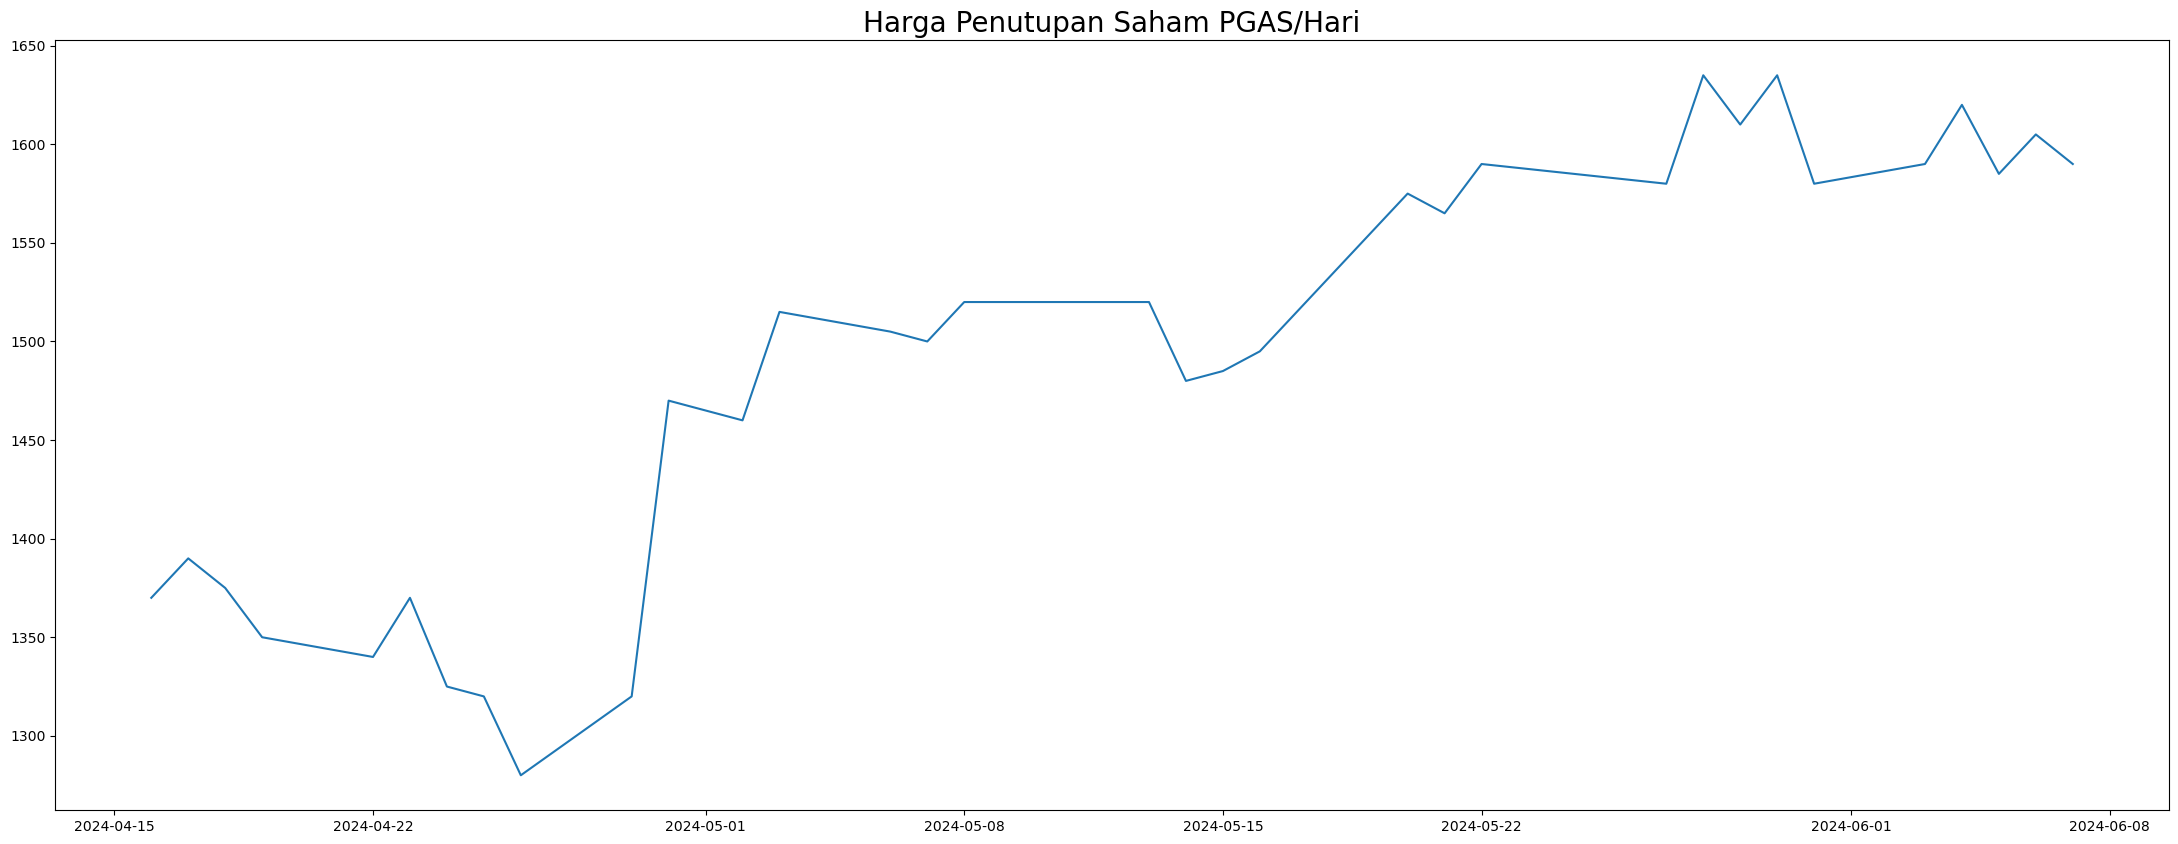

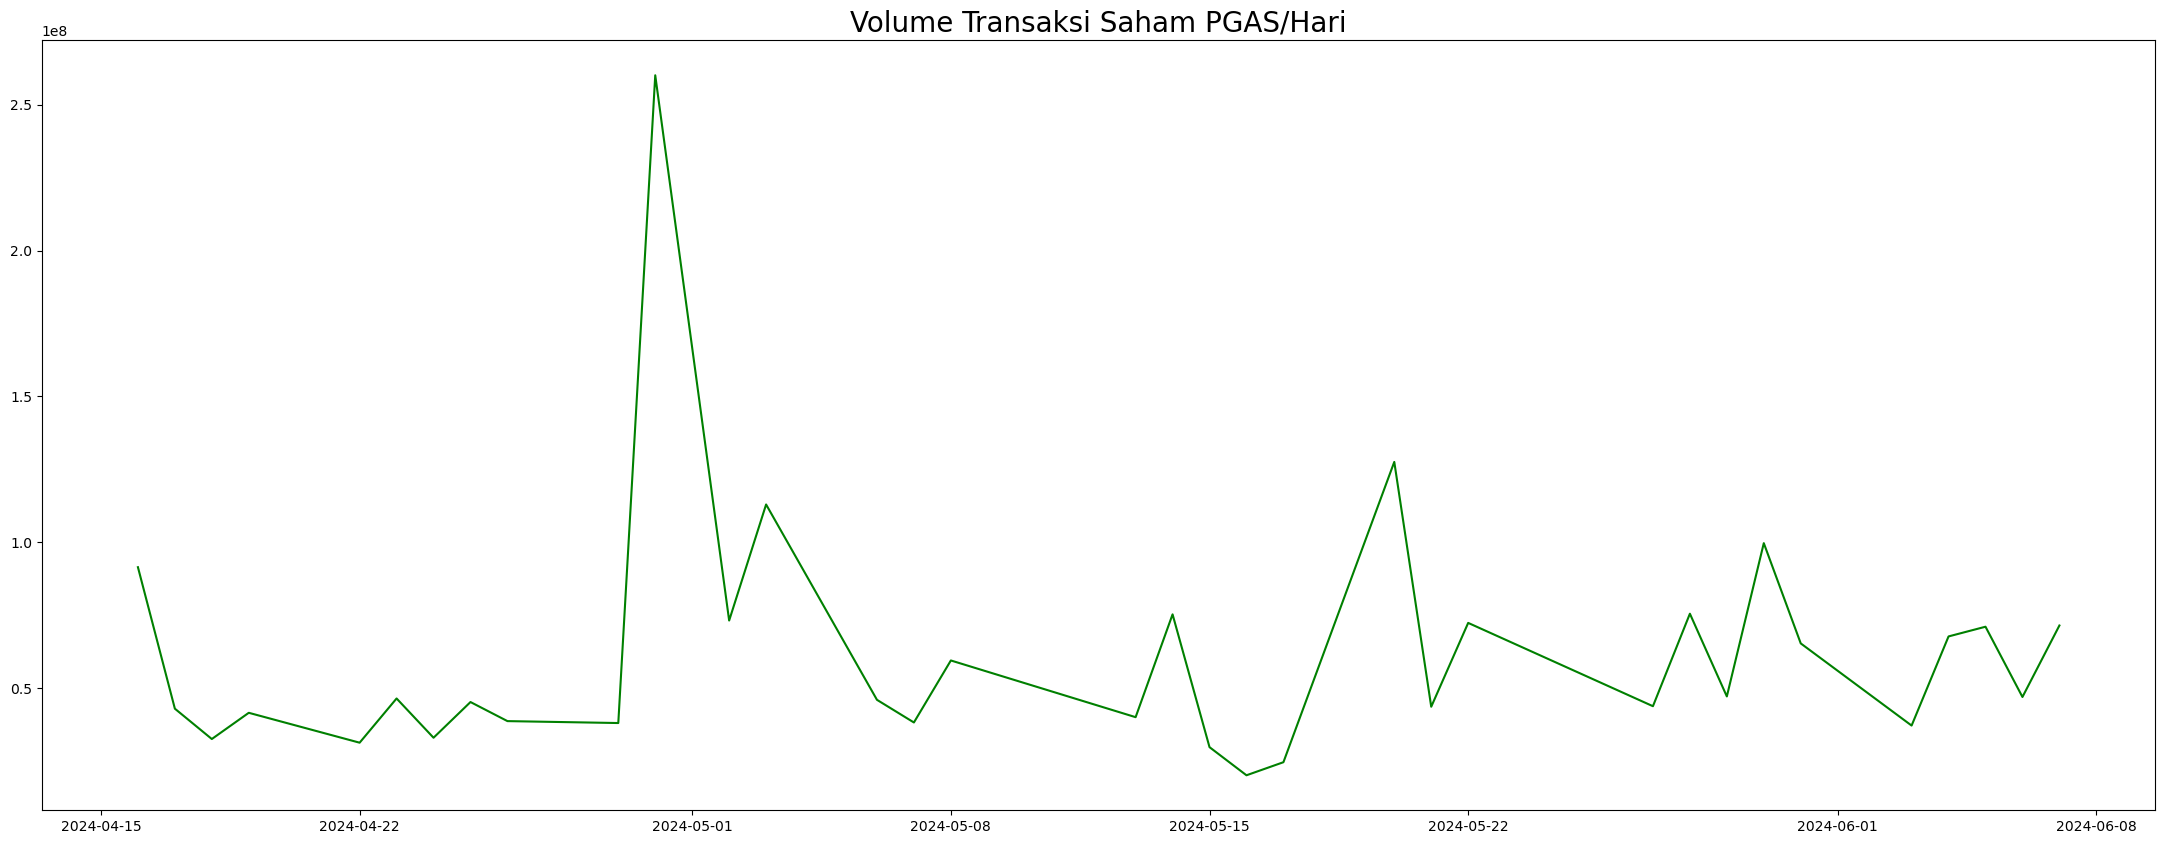

In [51]:
plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset_new['Tanggal'], dataset_new['Terakhir'])
plt.title('Harga Penutupan Saham PGAS/Hari', fontsize = 20)

plt.figure(figsize=(60,10))

plt.subplot(1,2,1)
plt.plot(dataset_new['Tanggal'], dataset_new['Vol'], 'g')
plt.title('Volume Transaksi Saham PGAS/Hari', fontsize = 20)

plt.show()

In [52]:
data_use_new = np.column_stack((dataset_new['Terakhir'], dataset_new['Vol']))
tanggal_data_new = pd.DataFrame({'Tanggal' : dataset_new['Tanggal']})

print(data_use_new)
print(tanggal_data_new)

[[1.3700e+03 9.1480e+07]
 [1.3900e+03 4.2970e+07]
 [1.3750e+03 3.2570e+07]
 [1.3500e+03 4.1560e+07]
 [1.3400e+03 3.1310e+07]
 [1.3700e+03 4.6470e+07]
 [1.3250e+03 3.3010e+07]
 [1.3200e+03 4.5250e+07]
 [1.2800e+03 3.8710e+07]
 [1.3200e+03 3.8050e+07]
 [1.4700e+03 2.6012e+08]
 [1.4600e+03 7.3190e+07]
 [1.5150e+03 1.1298e+08]
 [1.5050e+03 4.6010e+07]
 [1.5000e+03 3.8240e+07]
 [1.5200e+03 5.9500e+07]
 [1.5200e+03 4.0060e+07]
 [1.4800e+03 7.5310e+07]
 [1.4850e+03 2.9780e+07]
 [1.4950e+03 2.0140e+07]
 [1.5150e+03 2.4620e+07]
 [1.5750e+03 1.2757e+08]
 [1.5650e+03 4.3640e+07]
 [1.5900e+03 7.2380e+07]
 [1.5800e+03 4.3820e+07]
 [1.6350e+03 7.5530e+07]
 [1.6100e+03 4.7170e+07]
 [1.6350e+03 9.9720e+07]
 [1.5800e+03 6.5350e+07]
 [1.5900e+03 3.7180e+07]
 [1.6200e+03 6.7740e+07]
 [1.5850e+03 7.1070e+07]
 [1.6050e+03 4.6980e+07]
 [1.5900e+03 7.1490e+07]]
      Tanggal
0  2024-04-16
1  2024-04-17
2  2024-04-18
3  2024-04-19
4  2024-04-22
5  2024-04-23
6  2024-04-24
7  2024-04-25
8  2024-04-26
9  2024-0

In [53]:
scaled_data_new = scaler.fit_transform(data_use_new)

In [54]:
print(scaled_data_new)

[[0.25352097 0.29727477]
 [0.30985904 0.09513292]
 [0.26760554 0.05179598]
 [0.19718313 0.08925744]
 [0.16901398 0.04654554]
 [0.25352097 0.10971747]
 [0.12676048 0.05362947]
 [0.11267591 0.10463371]
 [0.         0.07738144]
 [0.11267591 0.07463122]
 [0.5352111  1.        ]
 [0.5070424  0.22106007]
 [0.66197157 0.38686556]
 [0.6338029  0.10780064]
 [0.6197181  0.07542295]
 [0.6760564  0.16401365]
 [0.6760564  0.08300691]
 [0.56338024 0.22989413]
 [0.5774646  0.04017001]
 [0.60563374 0.        ]
 [0.66197157 0.01866822]
 [0.830986   0.44766226]
 [0.80281687 0.09792482]
 [0.8732395  0.2176848 ]
 [0.84507036 0.09867489]
 [1.         0.23081088]
 [0.92957735 0.11263438]
 [1.         0.33161095]
 [0.84507036 0.18839067]
 [0.8732395  0.07100592]
 [0.9577465  0.19834986]
 [0.8591547  0.212226  ]
 [0.915493   0.11184265]
 [0.8732395  0.21397614]]


In [55]:
harga_new = scaled_data_new[:, 0]
volume_new = scaled_data_new[:, 1]
print(harga_new)
print(volume_new)

[0.25352097 0.30985904 0.26760554 0.19718313 0.16901398 0.25352097
 0.12676048 0.11267591 0.         0.11267591 0.5352111  0.5070424
 0.66197157 0.6338029  0.6197181  0.6760564  0.6760564  0.56338024
 0.5774646  0.60563374 0.66197157 0.830986   0.80281687 0.8732395
 0.84507036 1.         0.92957735 1.         0.84507036 0.8732395
 0.9577465  0.8591547  0.915493   0.8732395 ]
[0.29727477 0.09513292 0.05179598 0.08925744 0.04654554 0.10971747
 0.05362947 0.10463371 0.07738144 0.07463122 1.         0.22106007
 0.38686556 0.10780064 0.07542295 0.16401365 0.08300691 0.22989413
 0.04017001 0.         0.01866822 0.44766226 0.09792482 0.2176848
 0.09867489 0.23081088 0.11263438 0.33161095 0.18839067 0.07100592
 0.19834986 0.212226   0.11184265 0.21397614]


In [56]:
seq_length = 10  # Panjang urutan yang digunakan untuk pelatihan
predict_length = 20  # Prediksi 1 bulan ke depan (20 hari perdagangan)

x_new = []

for i in range(len(scaled_data_new) - seq_length):
    x_new.append(scaled_data_new[i:i + seq_length])

x_new = np.array(x_new)

# Convert to PyTorch tensors
x_new_tensor = torch.tensor(x_new, dtype=torch.float32)

In [57]:
model.eval()
with torch.no_grad():
    predictions_new = model(x_new_tensor)

# Konversi prediksi dari tensor ke numpy array
predictions_new = predictions_new.numpy()

In [58]:
print(predictions_new)

[[0.1598857 ]
 [0.15188137]
 [0.17564027]
 [0.2349338 ]
 [0.31557542]
 [0.39401555]
 [0.45739496]
 [0.5053764 ]
 [0.5421584 ]
 [0.570256  ]
 [0.5868767 ]
 [0.59446836]
 [0.6003477 ]
 [0.6139938 ]
 [0.6388356 ]
 [0.6726125 ]
 [0.7115268 ]
 [0.7529109 ]
 [0.7982943 ]
 [0.83539885]
 [0.86225337]
 [0.87920433]
 [0.88723636]
 [0.89043236]]


In [59]:
# Ambil hanya kolom harga dari prediksi (kolom pertama)
predicted_prices_new = scaler.inverse_transform(
    np.concatenate([predictions_new, np.zeros((predictions_new.shape[0], 1))], axis=1)
)[:, 0]

In [60]:
print(predicted_prices_new)

[1336.75944826 1333.91790833 1342.35231924 1363.4015208  1392.0292995
 1419.87554655 1442.3752368  1459.40864896 1472.46626875 1482.44090643
 1488.34125357 1491.03629467 1493.12346135 1497.96783618 1506.78667031
 1518.77746289 1532.59204799 1547.28340433 1563.39450968 1576.56662434
 1586.09997753 1592.11757029 1594.96893887 1596.10351929]


In [61]:
df_new = pd.DataFrame(dataset_new, columns=['Tanggal', 'Terakhir', 'Vol'])

In [62]:
df_new

,Tanggal,Terakhir,Vol
0,2024-04-16,1370.0,91480000.0
1,2024-04-17,1390.0,42970000.0
2,2024-04-18,1375.0,32570000.0
3,2024-04-19,1350.0,41560000.0
4,2024-04-22,1340.0,31310000.0
5,2024-04-23,1370.0,46470000.0
6,2024-04-24,1325.0,33010000.0
7,2024-04-25,1320.0,45250000.0
8,2024-04-26,1280.0,38710000.0
9,2024-04-29,1320.0,38050000.0


In [63]:
# Buat DataFrame untuk prediksi dimulai dari tanggal 10
# Ambil tanggal terakhir dari data asli
last_date = pd.to_datetime(df_new['Tanggal'].iloc[-1])

# Tentukan tanggal mulai prediksi
start_date = last_date + pd.Timedelta(days=3)  # Dari tanggal 7 ke tanggal 10

# Buat range tanggal untuk prediksi
pred_dates = pd.date_range(start=start_date, periods=predict_length)

In [64]:
# Buat DataFrame untuk prediksi
pred_df = pd.DataFrame({'Tanggal': pred_dates, 'Harga_Terprediksi': predicted_prices_new[-predict_length:]})

# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

In [65]:
# Gabungkan dengan DataFrame asli
result_df_new = pd.concat([df_new, pred_df[['Tanggal', 'Harga_Terprediksi']]], axis=0)

print(result_df_new)

      Tanggal  Terakhir          Vol  Harga_Terprediksi
0  2024-04-16    1370.0   91480000.0                NaN
1  2024-04-17    1390.0   42970000.0                NaN
2  2024-04-18    1375.0   32570000.0                NaN
3  2024-04-19    1350.0   41560000.0                NaN
4  2024-04-22    1340.0   31310000.0                NaN
5  2024-04-23    1370.0   46470000.0                NaN
6  2024-04-24    1325.0   33010000.0                NaN
7  2024-04-25    1320.0   45250000.0                NaN
8  2024-04-26    1280.0   38710000.0                NaN
9  2024-04-29    1320.0   38050000.0                NaN
10 2024-04-30    1470.0  260120000.0                NaN
11 2024-05-02    1460.0   73190000.0                NaN
12 2024-05-03    1515.0  112980000.0                NaN
13 2024-05-06    1505.0   46010000.0                NaN
14 2024-05-07    1500.0   38240000.0                NaN
15 2024-05-08    1520.0   59500000.0                NaN
16 2024-05-13    1520.0   40060000.0            

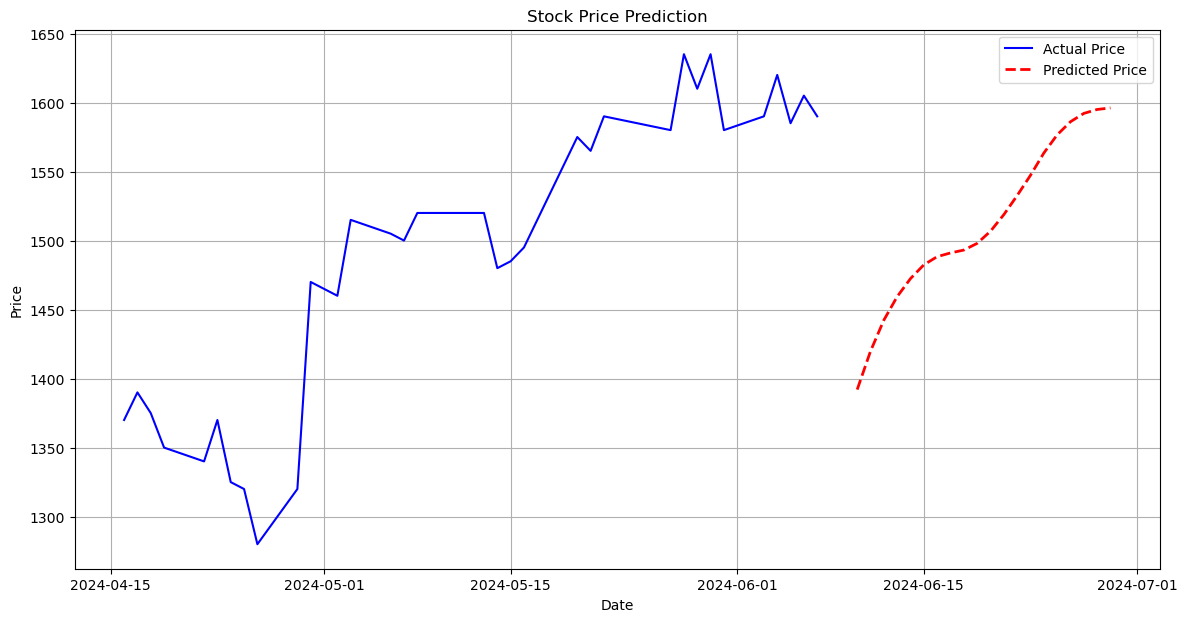

In [66]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot data asli
plt.plot(result_df_new['Tanggal'][:len(df_new)], df_new['Terakhir'], label='Actual Price', color='blue')

# Plot data prediksi
plt.plot(pred_df['Tanggal'], pred_df['Harga_Terprediksi'], label='Predicted Price', color='red', linestyle='--', linewidth=2)

# Konfigurasi grafik
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

In [67]:
result_df_new.to_csv('Harga Terprediksi PGAS.csv', index=False)